---
title: "Visualización de Datos"
subtitle: "Práctica 1: Introducción a Jupyter Notebooks"
author: "Francisco Javier Mercader Martínez"
format:
    pdf:
        documentclass: article
        number-sections: true
        hightlight-style: tango
linestretch: 1.5
papersize: a4
geometry: margin=1.5cm
---

# Celdas de código y Markdown

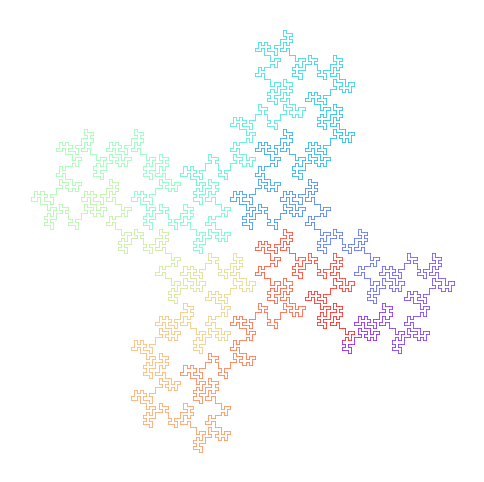

In [3]:
#| fig-align: "center"
#| caption: "Curva de 32 segementos"
import numpy as np
import matplotlib.pyplot as plt

# Define la regla de reemplazo y la palabra inicial
rule = {"F": "-F+F-F-F+F+FF-F+F+FF+F-F-FF+FF-FF+F+F-FF-F-F+FF-F-F+F+F-F+"}
inicio = "F+F+F+F"

# Función para aplicar la regla
def aplicar_regla(cadena):
    return "".join([rule.get(c, c) for c in cadena])

# Parámetros iniciales
punto_inicial = np.array([0, 0])
vector_unit_tortuga = np.array([0, 1])
angulo = 90.0
num_iteraciones = 2

# Generar la palabra final tras aplicar las reglas
palabra = inicio
for _ in range(num_iteraciones):
    palabra = aplicar_regla(palabra)

# Convertir la palabra en una lista de caracteres
caracteres = list(palabra)

# Inicializar variables para construir el fractal
fractal = []
rotacion_actual = 0

# Función para calcular la matriz de rotación
def matriz_rotacion(angulo):
    rad = np.radians(angulo)
    return np.array([[np.cos(rad), -np.sin(rad)], [np.sin(rad), np.cos(rad)]])

# Generar el fractal
for letra in caracteres:
    if letra == "+":
        rotacion_actual += angulo
    elif letra == "-":
        rotacion_actual -= angulo
    elif letra == "F":
        matriz_rot = matriz_rotacion(rotacion_actual)
        vector_unit_tortuga = np.dot(matriz_rot, np.array([0, 1]))
        punto_extremo = punto_inicial + vector_unit_tortuga
        fractal.append((punto_inicial, punto_extremo))
        punto_inicial = punto_extremo

# Dibujar el fractal
plt.figure(figsize=(6, 6))
for i, (p1, p2) in enumerate(fractal):
    p1_x, p1_y = p1
    p2_x, p2_y = p2
    plt.plot([p1_x, p2_x], [p1_y, p2_y], linewidth=0.5, color=plt.cm.rainbow(i / len(fractal)))
plt.gcf().set_facecolor("none")
plt.gca().set_facecolor("none")
plt.axis("equal")
plt.axis("off")
plt.show()

La imagen anterior representa un [Sistema-L](https://es.wikipedia.org/wiki/Sistema-L) llamado **Curva de 32 segmentos**.

El fractal utiliza un código genérico donde para representar un fractal diferentes se deben variar los siguientes elementos:

- `inicio`
- `rule`
- `grados`
- `num_iteraciones`